# Heart Disease Prediction

In this notebook we will perfomed a simple analysing the Heart Disease UCI dataset, building different models using the sklearn API, train and selecting the best model and save this one into a .pkl file ready for deployment.

### Libraries Needed

In [1]:
# basic libraries
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt
# ML library
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
import sklearn as skl

### Loading and Data Analysis

In this section we load the dataset and performed a simple data analysis.

In [2]:
dataset = pd.read_csv('heart.csv')
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Class Distribution

After loading the dataset we can explore for example the class distribution so we can take into account the modal class.

In [26]:
# class balance
cb = dataset['target'].value_counts()
print(f'{cb[1]} positives samples and {cb[0]} negatives samples')

165 positives samples and 138 negatives samples


It is even better to visualize it in a Pie chart. From the figure below we can observe that 54.5% of the samples are positives and 45.5% are negative. Therefore, we can assume that we have an almost balanced dataset.

Text(0.5, 1.0, 'Class Distribution')

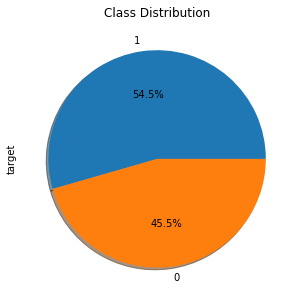

In [27]:
plot1 = dataset['target'].value_counts().plot(kind='pie', shadow = True,figsize=(5,5), autopct='%1.1f%%')
plt.title('Class Distribution')

#### Correlation measurement

Another analysis could be the correlation measurement of the different features with the target. For this operation we can simply use the `.corr()` object of the Pandas dataframe as follow:

In [ ]:
dataset[dataset.columns[:]].corr()['target'][:].sort_values(ascending=False)[1:]

From this correlation operation we can observe that the features **cp, thelach and slope** had the greatest positive correlation and **exang, oldpeak, ca and thal** the greatest negative correlation. Furthermore, the features **fbs and chol** have the lowest correlation values. We can also visualize this information in a bar chart as shown below:

In [ ]:
plot2 = dataset[dataset.columns[:]].corr()['target'][:].sort_values(ascending=False)[1:].plot(kind='bar', figsize=(15, 5))
plt.title('Correlation of Features with Target')
plt.xlabel('Feature')
plt.ylabel('Correlation value')

#### Data Preparation

In this section we will simply split the dataset into training and testing using the classic 70-30% division.

In [ ]:
# separating input and output
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]
# separating training and validation
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=50)
print('Input dimension = ', x_train.shape, '\nNo. examples for validation = ', len(y_val))

In [37]:
## Training the model

cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

From this correlation operation we can observe that the features **cp, thelach and slope** had the greatest positive correlation and **exang, oldpeak, ca and thal** the greatest negative correlation. Furthermore, the features **fbs and chol** have the lowest correlation values. We can also visualize this information in a bar chart as shown below:

Text(0, 0.5, 'Correlation value')

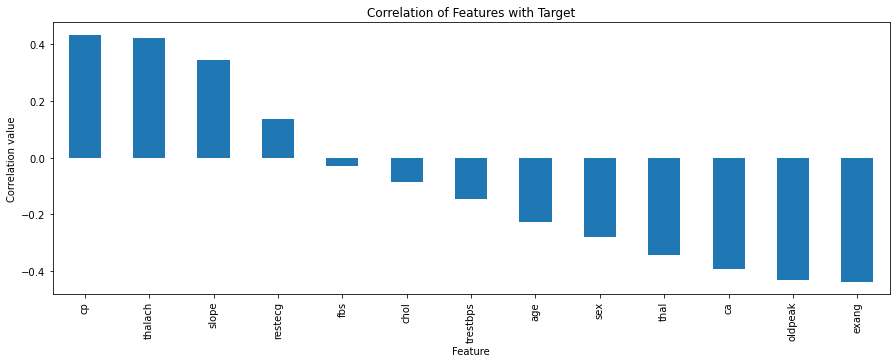

In [43]:
plot2 = dataset[dataset.columns[:]].corr()['target'][:].sort_values(ascending=False)[1:].plot(kind='bar', figsize=(15, 5))
plt.title('Correlation of Features with Target')
plt.xlabel('Feature')
plt.ylabel('Correlation value')

#### Data Preparation

In this section we will simply split the dataset into training and testing using the classic 70-30% division.

In [44]:
# separating input and output
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]
# separating training and validation
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=50)
print('Input dimension = ', x_train.shape, '\nNo. examples for validation = ', len(y_val))

Input dimension =  (212, 13) 
No. examples for validation =  91


## Training the model

In [ ]:
# Defining training folds
cv_ = KFold(n_splits=5)
# Evaluation Metric
evaluation_metric = 'f1'
# Initializing the model
MLP_model = MLPClassifier()
# Parameter Establishment
MLP_parameters = {'hidden_layer_sizes': [(30, 20, 10, 5), (30, 15, 5), (30, 15)],
            'activation': ['tanh', 'relu'],
            'solver': ['lbfgs', 'adam'],
            'learning_rate_init': [0.01, 0.001],
            'early_stopping': [True],
            'n_iter_no_change': [6],
            'max_iter': [20000]}

In [ ]:
model_parameter_finder = GridSearchCV(estimator=MLP_model, param_grid= MLP_parameters, cv=cv_)
model_parameter_finder.fit(x_train,y_train)
# Creating model with best parameters and training with train data
MLP_final = MLPClassifier(**model_parameter_finder.best_params_)
MLP_final.fit(x_train,y_train)

In [ ]:
# Getting confusion matrix on validation data
skl.metrics.plot_confusion_matrix(MLP_final, x_val, y_val)
print('MLP best parameter: %s, best score: %.2f%% '%(model_parameter_finder.best_params_, 100*model_parameter_finder.best_score_))

In [ ]:
prediction = MLP_final.predict(x_val)
print(classification_report(y_val, prediction))

## Saving the model

In [ ]:
pkl_filename = 'pickle_MLP_model'
with open(pkl_filename, 'wb') as file:
    pickle.dump(MLP_final, file)

## Loading the Model

In [ ]:
with open(pkl_filename, 'rb') as file:
    pickle_model=pickle.load(file)

print(pickle_model)

## Testing the loaded model

In [ ]:
score = pickle_model.score(x_val, y_val)
print('Test score: {0:.2f}%'.format(100*score))

pickle_model.predict(x_val)